In [2]:
# plot DMO correlation in Python!
# import libraries and data
%matplotlib inline
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
import pylab
DMOcorr = sio.loadmat('/home/calvin/Research_work/MCACCA_downscaling/Project_1/script2/DMO/DMOcorr.mat')
worldmap = sio.loadmat('/home/calvin/Research_work/map_data/world_map')
chinamap = sio.loadmat('/home/calvin/Research_work/map_data/China_map.mat')
lonlat = np.loadtxt('/home/calvin/Research_work/MCACCA_downscaling/Data_from_Karl/observation_rainfall/lonlat.txt')

# print(DMOcorr)

In [3]:
# DMO data
DMOcorr_DJF = DMOcorr['DMOcorr_DJF']
DMOcorr_MAM = DMOcorr['DMOcorr_MAM']
DMOcorr_JJA = DMOcorr['DMOcorr_JJA']
DMOcorr_SON = DMOcorr['DMOcorr_SON']
DMOcorr_DJF.shape
# Map data
wmX = worldmap['world_mapX'] 
wmY = worldmap['world_mapY']
cmX = chinamap['China_map_X']
cmY = chinamap['China_map_Y']

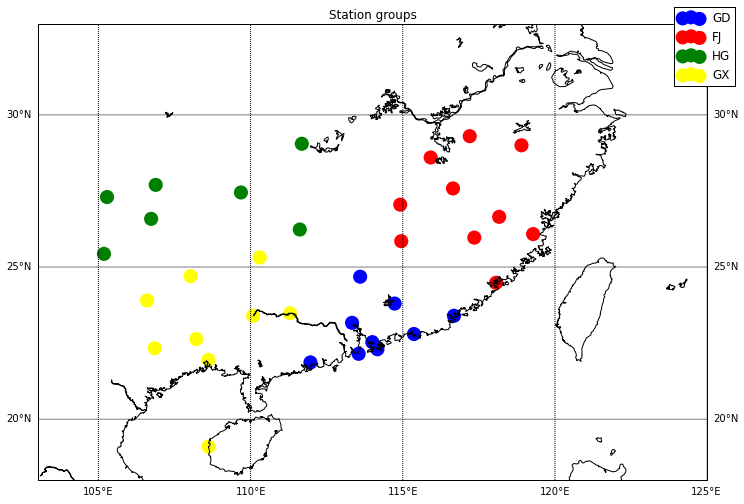

In [4]:
# Define station groups and show in map 1
gGD = np.array([3,18,22,25,30,32,33,34,35])-1
gFJ = np.array([1,2,7,9,10,15,17,20,24,28])-1
gHG = np.array([6,13,16,19,23,26,27])-1
gGX = np.array([4,5,8,11,12,14,21,29,31])-1
#print(gGD)
#print(lonlat)
fig = plt.figure(figsize=(12,12))
m = Basemap(projection='cyl',llcrnrlat=18,urcrnrlat=33,\
            llcrnrlon=103,urcrnrlon=125,resolution='i')
m.drawcoastlines()
z1 = m.scatter(lonlat[gGD,0],lonlat[gGD,1],s=200, facecolors='blue',edgecolors='none')
z2 = m.scatter(lonlat[gFJ,0],lonlat[gFJ,1],s=200, facecolors='red',edgecolors='none')
z3 = m.scatter(lonlat[gHG,0],lonlat[gHG,1],s=200, facecolors='green',edgecolors='none')
z4 = m.scatter(lonlat[gGX,0],lonlat[gGX,1],s=200, facecolors='yellow',edgecolors='none')
m.drawparallels(np.arange(10,40,5),labels=[1,1,0,0])
m.drawmeridians(np.arange(100,130,5),labels=[0,0,0,1])
plt.title('Station groups')
plt.legend((z1,z2,z3,z4),('GD','FJ','HG','GX'),bbox_to_anchor=(1.05, 1.05))
#plt.show()
#pylab.savefig("/home/calvin/Research_work/MCACCA_downscaling/Project_1/script2/python_plots/station_group.pdf")

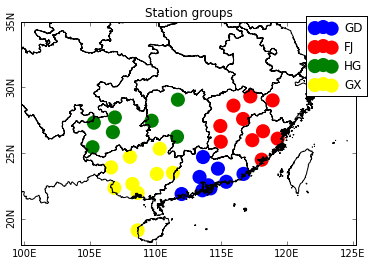

In [5]:
# Define station groups and show in map 2 (use alternative map)
gGD = np.array([3,18,22,25,30,32,33,34,35])-1
gFJ = np.array([1,2,7,9,10,15,17,20,24,28])-1
gHG = np.array([6,13,16,19,23,26,27])-1
gGX = np.array([4,5,8,11,12,14,21,29,31])-1
#fig = plt.figure(figsize=(12,12))
z1 = plt.scatter(lonlat[gGD,0],lonlat[gGD,1],s=200, facecolors='blue',edgecolors='none')
z2 = plt.scatter(lonlat[gFJ,0],lonlat[gFJ,1],s=200, facecolors='red',edgecolors='none')
z3 = plt.scatter(lonlat[gHG,0],lonlat[gHG,1],s=200, facecolors='green',edgecolors='none')
z4 = plt.scatter(lonlat[gGX,0],lonlat[gGX,1],s=200, facecolors='yellow',edgecolors='none')
plt.title('Station groups')
plt.legend((z1,z2,z3,z4),('GD','FJ','HG','GX'),bbox_to_anchor=(1.05, 1.05))
plt.plot(cmX, cmY, color = 'black')
pylab.xlim([104,124])
pylab.ylim([18,33])
xtl = ['100E','105E','110E','115E','120E','125E']
ytl = ['20N','25N','30N','35N']
plt.xticks(list(range(100,126,5)), xtl)
plt.yticks(list(range(20,36,5)), ytl, rotation='vertical')
plt.axes().set_aspect('equal', 'datalim')
#plt.show()
#pylab.savefig("/home/calvin/Research_work/MCACCA_downscaling/Project_1/script2/python_plots/station_group2.pdf")

In [35]:
DMO_av = np.empty((4,5,6))
for mod in range(0,6):
    DJF_av = [np.mean(DMOcorr_DJF[gGD,mod]),np.mean(DMOcorr_DJF[gFJ,mod]),np.mean(DMOcorr_DJF[gHG,mod]),np.mean(DMOcorr_DJF[gGX,mod]),np.mean(DMOcorr_DJF[:,mod])]
    MAM_av = [np.mean(DMOcorr_MAM[gGD,mod]),np.mean(DMOcorr_MAM[gFJ,mod]),np.mean(DMOcorr_MAM[gHG,mod]),np.mean(DMOcorr_MAM[gGX,mod]),np.mean(DMOcorr_MAM[:,mod])]
    JJA_av = [np.mean(DMOcorr_JJA[gGD,mod]),np.mean(DMOcorr_JJA[gFJ,mod]),np.mean(DMOcorr_JJA[gHG,mod]),np.mean(DMOcorr_JJA[gGX,mod]),np.mean(DMOcorr_JJA[:,mod])]
    SON_av = [np.mean(DMOcorr_SON[gGD,mod]),np.mean(DMOcorr_SON[gFJ,mod]),np.mean(DMOcorr_SON[gHG,mod]),np.mean(DMOcorr_SON[gGX,mod]),np.mean(DMOcorr_SON[:,mod])]

    DMO_av[:,:,mod] = np.matrix([DJF_av,MAM_av,JJA_av,SON_av])
print(np.shape(DMO_av))

(4, 5, 6)


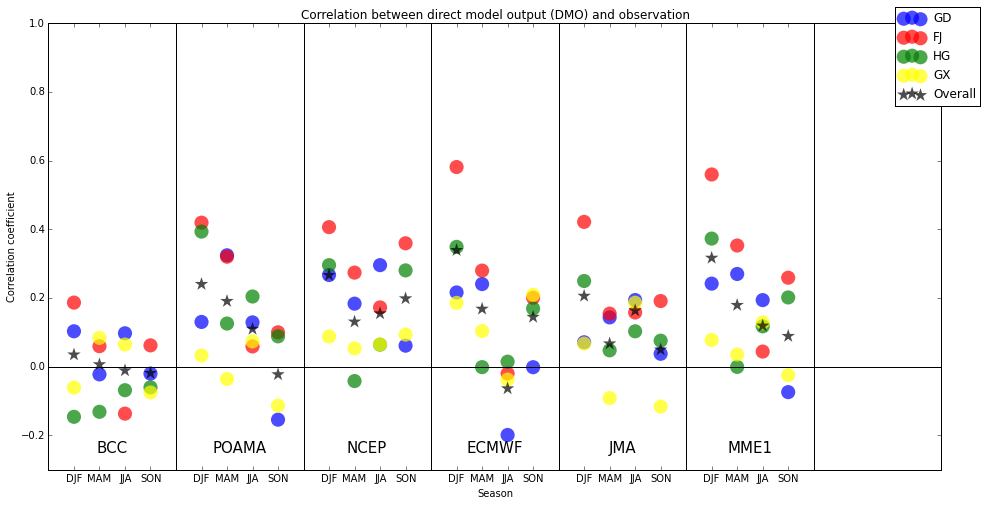

In [15]:
# plot DMO correlation
fig = plt.figure(figsize=(16,8))
z1 = plt.scatter(range(0,4),list(DMO_av[:,0,0]), s=200, marker='o', facecolors='blue', edgecolors='none', alpha = 0.7)
z2 = plt.scatter(range(0,4),list(DMO_av[:,1,0]), s=200, marker='o', facecolors='red', edgecolors='none', alpha = 0.7)
z3 = plt.scatter(range(0,4),list(DMO_av[:,2,0]), s=200, marker='o', facecolors='green', edgecolors='none', alpha = 0.7)
z4 = plt.scatter(range(0,4),list(DMO_av[:,3,0]), s=200, marker='o', facecolors='yellow', edgecolors='none', alpha = 0.7)
z5 = plt.scatter(range(0,4),list(DMO_av[:,4,0]), s=200, marker='*', facecolors='black', edgecolors='none', alpha = 0.7)

plt.scatter(range(5,9),list(DMO_av[:,0,1]), s=200, marker='o', facecolors='blue', edgecolors='none', alpha = 0.7)
plt.scatter(range(5,9),list(DMO_av[:,1,1]), s=200, marker='o', facecolors='red', edgecolors='none', alpha = 0.7)
plt.scatter(range(5,9),list(DMO_av[:,2,1]), s=200, marker='o', facecolors='green', edgecolors='none', alpha = 0.7)
plt.scatter(range(5,9),list(DMO_av[:,3,1]), s=200, marker='o', facecolors='yellow', edgecolors='none', alpha = 0.7)
plt.scatter(range(5,9),list(DMO_av[:,4,1]), s=200, marker='*', facecolors='black', edgecolors='none', alpha = 0.7)

plt.scatter(range(10,14),list(DMO_av[:,0,2]), s=200, marker='o', facecolors='blue', edgecolors='none', alpha = 0.7)
plt.scatter(range(10,14),list(DMO_av[:,1,2]), s=200, marker='o', facecolors='red', edgecolors='none', alpha = 0.7)
plt.scatter(range(10,14),list(DMO_av[:,2,2]), s=200, marker='o', facecolors='green', edgecolors='none', alpha = 0.7)
plt.scatter(range(10,14),list(DMO_av[:,3,2]), s=200, marker='o', facecolors='yellow', edgecolors='none', alpha = 0.7)
plt.scatter(range(10,14),list(DMO_av[:,4,2]), s=200, marker='*', facecolors='black', edgecolors='none', alpha = 0.7)

plt.scatter(range(15,19),list(DMO_av[:,0,3]), s=200, marker='o', facecolors='blue', edgecolors='none', alpha = 0.7)
plt.scatter(range(15,19),list(DMO_av[:,1,3]), s=200, marker='o', facecolors='red', edgecolors='none', alpha = 0.7)
plt.scatter(range(15,19),list(DMO_av[:,2,3]), s=200, marker='o', facecolors='green', edgecolors='none', alpha = 0.7)
plt.scatter(range(15,19),list(DMO_av[:,3,3]), s=200, marker='o', facecolors='yellow', edgecolors='none', alpha = 0.7)
plt.scatter(range(15,19),list(DMO_av[:,4,3]), s=200, marker='*', facecolors='black', edgecolors='none', alpha = 0.7)

plt.scatter(range(20,24),list(DMO_av[:,0,4]), s=200, marker='o', facecolors='blue', edgecolors='none', alpha = 0.7)
plt.scatter(range(20,24),list(DMO_av[:,1,4]), s=200, marker='o', facecolors='red', edgecolors='none', alpha = 0.7)
plt.scatter(range(20,24),list(DMO_av[:,2,4]), s=200, marker='o', facecolors='green', edgecolors='none', alpha = 0.7)
plt.scatter(range(20,24),list(DMO_av[:,3,4]), s=200, marker='o', facecolors='yellow', edgecolors='none', alpha = 0.7)
plt.scatter(range(20,24),list(DMO_av[:,4,4]), s=200, marker='*', facecolors='black', edgecolors='none', alpha = 0.7)

plt.scatter(range(25,29),list(DMO_av[:,0,5]), s=200, marker='o', facecolors='blue', edgecolors='none', alpha = 0.7)
plt.scatter(range(25,29),list(DMO_av[:,1,5]), s=200, marker='o', facecolors='red', edgecolors='none', alpha = 0.7)
plt.scatter(range(25,29),list(DMO_av[:,2,5]), s=200, marker='o', facecolors='green', edgecolors='none', alpha = 0.7)
plt.scatter(range(25,29),list(DMO_av[:,3,5]), s=200, marker='o', facecolors='yellow', edgecolors='none', alpha = 0.7)
plt.scatter(range(25,29),list(DMO_av[:,4,5]), s=200, marker='*', facecolors='black', edgecolors='none', alpha = 0.7)

pylab.xticks(list(range(0,29)), ['DJF','MAM','JJA','SON','','DJF','MAM','JJA','SON','','DJF','MAM','JJA','SON','','DJF','MAM','JJA','SON','','DJF','MAM','JJA','SON','','DJF','MAM','JJA','SON'])
pylab.ylim([-0.3,1])
pylab.xlim([-1,34])
plt.plot([-1,34],[0,0],color = 'black')
plt.plot([4,4],[-1,1],color = 'black')
plt.plot([9,9],[-1,1],color = 'black')
plt.plot([14,14],[-1,1],color = 'black')
plt.plot([19,19],[-1,1],color = 'black')
plt.plot([24,24],[-1,1],color = 'black')
plt.plot([29,29],[-1,1],color = 'black')
mlh = -0.25
mll = np.linspace(2,27, num=6)-0.5
mlist = ['BCC','POAMA','NCEP','ECMWF','JMA','MME1','MME2']
for i in range(0,6):
    plt.text(mll[i],mlh,mlist[i],horizontalalignment='center',fontsize=15)
    
plt.title('Correlation between direct model output (DMO) and observation')
plt.ylabel('Correlation coefficient')
plt.xlabel('Season')
plt.legend((z1,z2,z3,z4,z5),('GD','FJ','HG','GX','Overall'),bbox_to_anchor=(1.05, 1.05))

#plt.show()
pylab.savefig("/home/calvin/Research_work/MCACCA_downscaling/Project_1/script2/python_plots/DMOcorr.pdf")

In [18]:
# plot MLR correlation
DScorr = sio.loadmat('/home/calvin/Research_work/MCACCA_downscaling/Project_1/script2/Downscaled/downscaling2.mat')
#print(DScorr)
#sio.whosmat('/home/calvin/Research_work/MCACCA_downscaling/Project_1/script2/Downscaled/downscaling2.mat')
MLRcorr = DScorr['corr_m1_S']
SUBcorr = DScorr['corr_s1_S']
test = np.mean(MLRcorr[:,:,0],axis=1)
print(test)


[ 0.24489872  0.27620106  0.16520415  0.16227896  0.23209035  0.2805288
  0.31759617  0.31707262]


In [19]:
np.shape(SUBcorr)

(8, 35, 4)

In [37]:
MLR_av = np.empty((8,5,4))
SUB_av = np.empty((8,5,4))
for mod in range(0,8):
    for season in range(0,4):
        MLR_av[mod,:,season] = np.matrix([np.mean(MLRcorr[mod,gGD,season]),np.mean(MLRcorr[mod,gFJ,season]),np.mean(MLRcorr[mod,gHG,season]),np.mean(MLRcorr[mod,gGX,season]),np.mean(MLRcorr[mod,:,season])])
        SUB_av[mod,:,season] = np.matrix([np.mean(SUBcorr[mod,gGD,season]),np.mean(SUBcorr[mod,gFJ,season]),np.mean(SUBcorr[mod,gHG,season]),np.mean(SUBcorr[mod,gGX,season]),np.mean(SUBcorr[mod,:,season])])
        
print(np.shape(MLR_av))

(8, 5, 4)


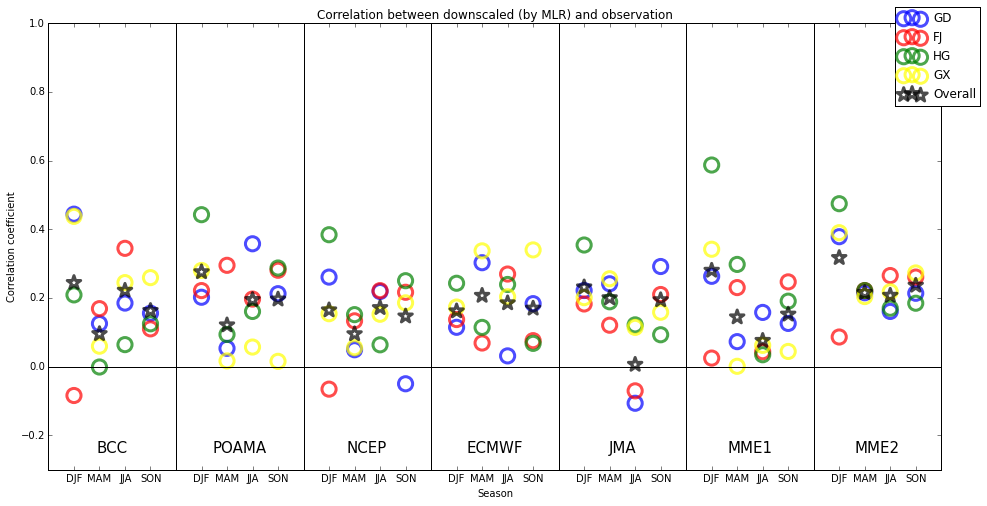

In [24]:
# plot MLR correlation
fig = plt.figure(figsize=(16,8))
z1 = plt.scatter(range(0,4),list(MLR_av[0,0,:]), s=200, marker='o', facecolors='none', edgecolors='blue', linewidth='3', alpha = 0.7)
z2 = plt.scatter(range(0,4),list(MLR_av[0,1,:]), s=200, marker='o', facecolors='none', edgecolors='red', linewidth='3', alpha = 0.7)
z3 = plt.scatter(range(0,4),list(MLR_av[0,2,:]), s=200, marker='o', facecolors='none', edgecolors='green', linewidth='3', alpha = 0.7)
z4 = plt.scatter(range(0,4),list(MLR_av[0,3,:]), s=200, marker='o', facecolors='none', edgecolors='yellow', linewidth='3', alpha = 0.7)
z5 = plt.scatter(range(0,4),list(MLR_av[0,4,:]), s=200, marker='*', facecolors='none', edgecolors='black', linewidth='3', alpha = 0.7)

z1 = plt.scatter(range(5,9),list(MLR_av[1,0,:]), s=200, marker='o', facecolors='none', edgecolors='blue', linewidth='3', alpha = 0.7)
z2 = plt.scatter(range(5,9),list(MLR_av[1,1,:]), s=200, marker='o', facecolors='none', edgecolors='red', linewidth='3', alpha = 0.7)
z3 = plt.scatter(range(5,9),list(MLR_av[1,2,:]), s=200, marker='o', facecolors='none', edgecolors='green', linewidth='3', alpha = 0.7)
z4 = plt.scatter(range(5,9),list(MLR_av[1,3,:]), s=200, marker='o', facecolors='none', edgecolors='yellow', linewidth='3', alpha = 0.7)
z5 = plt.scatter(range(5,9),list(MLR_av[1,4,:]), s=200, marker='*', facecolors='none', edgecolors='black', linewidth='3', alpha = 0.7)

z1 = plt.scatter(range(10,14),list(MLR_av[2,0,:]), s=200, marker='o', facecolors='none', edgecolors='blue', linewidth='3', alpha = 0.7)
z2 = plt.scatter(range(10,14),list(MLR_av[2,1,:]), s=200, marker='o', facecolors='none', edgecolors='red', linewidth='3', alpha = 0.7)
z3 = plt.scatter(range(10,14),list(MLR_av[2,2,:]), s=200, marker='o', facecolors='none', edgecolors='green', linewidth='3', alpha = 0.7)
z4 = plt.scatter(range(10,14),list(MLR_av[2,3,:]), s=200, marker='o', facecolors='none', edgecolors='yellow', linewidth='3', alpha = 0.7)
z5 = plt.scatter(range(10,14),list(MLR_av[2,4,:]), s=200, marker='*', facecolors='none', edgecolors='black', linewidth='3', alpha = 0.7)

z1 = plt.scatter(range(15,19),list(MLR_av[3,0,:]), s=200, marker='o', facecolors='none', edgecolors='blue', linewidth='3', alpha = 0.7)
z2 = plt.scatter(range(15,19),list(MLR_av[3,1,:]), s=200, marker='o', facecolors='none', edgecolors='red', linewidth='3', alpha = 0.7)
z3 = plt.scatter(range(15,19),list(MLR_av[3,2,:]), s=200, marker='o', facecolors='none', edgecolors='green', linewidth='3', alpha = 0.7)
z4 = plt.scatter(range(15,19),list(MLR_av[3,3,:]), s=200, marker='o', facecolors='none', edgecolors='yellow', linewidth='3', alpha = 0.7)
z5 = plt.scatter(range(15,19),list(MLR_av[3,4,:]), s=200, marker='*', facecolors='none', edgecolors='black', linewidth='3', alpha = 0.7)

z1 = plt.scatter(range(20,24),list(MLR_av[4,0,:]), s=200, marker='o', facecolors='none', edgecolors='blue', linewidth='3', alpha = 0.7)
z2 = plt.scatter(range(20,24),list(MLR_av[4,1,:]), s=200, marker='o', facecolors='none', edgecolors='red', linewidth='3', alpha = 0.7)
z3 = plt.scatter(range(20,24),list(MLR_av[4,2,:]), s=200, marker='o', facecolors='none', edgecolors='green', linewidth='3', alpha = 0.7)
z4 = plt.scatter(range(20,24),list(MLR_av[4,3,:]), s=200, marker='o', facecolors='none', edgecolors='yellow', linewidth='3', alpha = 0.7)
z5 = plt.scatter(range(20,24),list(MLR_av[4,4,:]), s=200, marker='*', facecolors='none', edgecolors='black', linewidth='3', alpha = 0.7)

z1 = plt.scatter(range(25,29),list(MLR_av[5,0,:]), s=200, marker='o', facecolors='none', edgecolors='blue', linewidth='3', alpha = 0.7)
z2 = plt.scatter(range(25,29),list(MLR_av[5,1,:]), s=200, marker='o', facecolors='none', edgecolors='red', linewidth='3', alpha = 0.7)
z3 = plt.scatter(range(25,29),list(MLR_av[5,2,:]), s=200, marker='o', facecolors='none', edgecolors='green', linewidth='3', alpha = 0.7)
z4 = plt.scatter(range(25,29),list(MLR_av[5,3,:]), s=200, marker='o', facecolors='none', edgecolors='yellow', linewidth='3', alpha = 0.7)
z5 = plt.scatter(range(25,29),list(MLR_av[5,4,:]), s=200, marker='*', facecolors='none', edgecolors='black', linewidth='3', alpha = 0.7)

z1 = plt.scatter(range(30,34),list(MLR_av[6,0,:]), s=200, marker='o', facecolors='none', edgecolors='blue', linewidth='3', alpha = 0.7)
z2 = plt.scatter(range(30,34),list(MLR_av[6,1,:]), s=200, marker='o', facecolors='none', edgecolors='red', linewidth='3', alpha = 0.7)
z3 = plt.scatter(range(30,34),list(MLR_av[6,2,:]), s=200, marker='o', facecolors='none', edgecolors='green', linewidth='3', alpha = 0.7)
z4 = plt.scatter(range(30,34),list(MLR_av[6,3,:]), s=200, marker='o', facecolors='none', edgecolors='yellow', linewidth='3', alpha = 0.7)
z5 = plt.scatter(range(30,34),list(MLR_av[6,4,:]), s=200, marker='*', facecolors='none', edgecolors='black', linewidth='3', alpha = 0.7)


#z1 = plt.scatter(range(5,9),list(MLR_av[1,0,:]), s=200, marker='o', facecolors='none', edgecolors='blue', linewidth='3', alpha = 0.7)
#z2 = plt.scatter(range(5,9),list(MLR_av[1,1,:]), s=200, marker='o', facecolors='none', edgecolors='red', linewidth='3', alpha = 0.7)
#z3 = plt.scatter(range(5,9),list(MLR_av[1,2,:]), s=200, marker='o', facecolors='none', edgecolors='green', linewidth='3', alpha = 0.7)
#z4 = plt.scatter(range(5,9),list(MLR_av[1,3,:]), s=200, marker='o', facecolors='none', edgecolors='yellow', linewidth='3', alpha = 0.7)

pylab.xticks(list(range(0,34)), ['DJF','MAM','JJA','SON','','DJF','MAM','JJA','SON','','DJF','MAM','JJA','SON','','DJF','MAM','JJA','SON','','DJF','MAM','JJA','SON','','DJF','MAM','JJA','SON','','DJF','MAM','JJA','SON'])
pylab.ylim([-0.3,1])
pylab.xlim([-1,34])
plt.plot([-1,34],[0,0],color = 'black')
plt.plot([4,4],[-1,1],color = 'black')
plt.plot([9,9],[-1,1],color = 'black')
plt.plot([14,14],[-1,1],color = 'black')
plt.plot([19,19],[-1,1],color = 'black')
plt.plot([24,24],[-1,1],color = 'black')
plt.plot([29,29],[-1,1],color = 'black')
mlh = -0.25
mll = np.linspace(2,32, num=7)-0.5
mlist = ['BCC','POAMA','NCEP','ECMWF','JMA','MME1','MME2']
for i in range(0,7):
    plt.text(mll[i],mlh,mlist[i],horizontalalignment='center',fontsize=15)
    
plt.title('Correlation between downscaled (by MLR) and observation')
plt.ylabel('Correlation coefficient')
plt.xlabel('Season')
plt.legend((z1,z2,z3,z4,z5),('GD','FJ','HG','GX','Overall'),bbox_to_anchor=(1.05, 1.05))

#plt.show()
pylab.savefig("/home/calvin/Research_work/MCACCA_downscaling/Project_1/script2/python_plots/MLRcorr.pdf")

In [28]:
# plot SUB correlation
fig = plt.figure(figsize=(16,8))
z1 = plt.scatter(range(0,4),list(SUB_av[0,0,:]), s=200, marker='d', facecolors='none', edgecolors='blue', linewidth='3', alpha = 0.7)
z2 = plt.scatter(range(0,4),list(SUB_av[0,1,:]), s=200, marker='d', facecolors='none', edgecolors='red', linewidth='3', alpha = 0.7)
z3 = plt.scatter(range(0,4),list(SUB_av[0,2,:]), s=200, marker='d', facecolors='none', edgecolors='green', linewidth='3', alpha = 0.7)
z4 = plt.scatter(range(0,4),list(SUB_av[0,3,:]), s=200, marker='d', facecolors='none', edgecolors='yellow', linewidth='3', alpha = 0.7)

z1 = plt.scatter(range(5,9),list(SUB_av[1,0,:]), s=200, marker='d', facecolors='none', edgecolors='blue', linewidth='3', alpha = 0.7)
z2 = plt.scatter(range(5,9),list(SUB_av[1,1,:]), s=200, marker='d', facecolors='none', edgecolors='red', linewidth='3', alpha = 0.7)
z3 = plt.scatter(range(5,9),list(SUB_av[1,2,:]), s=200, marker='d', facecolors='none', edgecolors='green', linewidth='3', alpha = 0.7)
z4 = plt.scatter(range(5,9),list(SUB_av[1,3,:]), s=200, marker='d', facecolors='none', edgecolors='yellow', linewidth='3', alpha = 0.7)

z1 = plt.scatter(range(10,14),list(SUB_av[2,0,:]), s=200, marker='d', facecolors='none', edgecolors='blue', linewidth='3', alpha = 0.7)
z2 = plt.scatter(range(10,14),list(SUB_av[2,1,:]), s=200, marker='d', facecolors='none', edgecolors='red', linewidth='3', alpha = 0.7)
z3 = plt.scatter(range(10,14),list(SUB_av[2,2,:]), s=200, marker='d', facecolors='none', edgecolors='green', linewidth='3', alpha = 0.7)
z4 = plt.scatter(range(10,14),list(SUB_av[2,3,:]), s=200, marker='d', facecolors='none', edgecolors='yellow', linewidth='3', alpha = 0.7)

z1 = plt.scatter(range(15,19),list(SUB_av[3,0,:]), s=200, marker='d', facecolors='none', edgecolors='blue', linewidth='3', alpha = 0.7)
z2 = plt.scatter(range(15,19),list(SUB_av[3,1,:]), s=200, marker='d', facecolors='none', edgecolors='red', linewidth='3', alpha = 0.7)
z3 = plt.scatter(range(15,19),list(SUB_av[3,2,:]), s=200, marker='d', facecolors='none', edgecolors='green', linewidth='3', alpha = 0.7)
z4 = plt.scatter(range(15,19),list(SUB_av[3,3,:]), s=200, marker='d', facecolors='none', edgecolors='yellow', linewidth='3', alpha = 0.7)

z1 = plt.scatter(range(20,24),list(SUB_av[4,0,:]), s=200, marker='d', facecolors='none', edgecolors='blue', linewidth='3', alpha = 0.7)
z2 = plt.scatter(range(20,24),list(SUB_av[4,1,:]), s=200, marker='d', facecolors='none', edgecolors='red', linewidth='3', alpha = 0.7)
z3 = plt.scatter(range(20,24),list(SUB_av[4,2,:]), s=200, marker='d', facecolors='none', edgecolors='green', linewidth='3', alpha = 0.7)
z4 = plt.scatter(range(20,24),list(SUB_av[4,3,:]), s=200, marker='d', facecolors='none', edgecolors='yellow', linewidth='3', alpha = 0.7)

z1 = plt.scatter(range(25,29),list(SUB_av[5,0,:]), s=200, marker='d', facecolors='none', edgecolors='blue', linewidth='3', alpha = 0.7)
z2 = plt.scatter(range(25,29),list(SUB_av[5,1,:]), s=200, marker='d', facecolors='none', edgecolors='red', linewidth='3', alpha = 0.7)
z3 = plt.scatter(range(25,29),list(SUB_av[5,2,:]), s=200, marker='d', facecolors='none', edgecolors='green', linewidth='3', alpha = 0.7)
z4 = plt.scatter(range(25,29),list(SUB_av[5,3,:]), s=200, marker='d', facecolors='none', edgecolors='yellow', linewidth='3', alpha = 0.7)

z1 = plt.scatter(range(30,34),list(SUB_av[6,0,:]), s=200, marker='d', facecolors='none', edgecolors='blue', linewidth='3', alpha = 0.7)
z2 = plt.scatter(range(30,34),list(SUB_av[6,1,:]), s=200, marker='d', facecolors='none', edgecolors='red', linewidth='3', alpha = 0.7)
z3 = plt.scatter(range(30,34),list(SUB_av[6,2,:]), s=200, marker='d', facecolors='none', edgecolors='green', linewidth='3', alpha = 0.7)
z4 = plt.scatter(range(30,34),list(SUB_av[6,3,:]), s=200, marker='d', facecolors='none', edgecolors='yellow', linewidth='3', alpha = 0.7)

#z1 = plt.scatter(range(5,9),list(SUB_av[1,0,:]), s=200, marker='d', facecolors='none', edgecolors='blue', linewidth='3', alpha = 0.7)
#z2 = plt.scatter(range(5,9),list(SUB_av[1,1,:]), s=200, marker='d', facecolors='none', edgecolors='red', linewidth='3', alpha = 0.7)
#z3 = plt.scatter(range(5,9),list(SUB_av[1,2,:]), s=200, marker='d', facecolors='none', edgecolors='green', linewidth='3', alpha = 0.7)
#z4 = plt.scatter(range(5,9),list(SUB_av[1,3,:]), s=200, marker='d', facecolors='none', edgecolors='yellow', linewidth='3', alpha = 0.7)

pylab.xticks(list(range(0,34)), ['DJF','MAM','JJA','SON','','DJF','MAM','JJA','SON','','DJF','MAM','JJA','SON','','DJF','MAM','JJA','SON','','DJF','MAM','JJA','SON','','DJF','MAM','JJA','SON','','DJF','MAM','JJA','SON'])
pylab.ylim([-0.3,1])
pylab.xlim([-1,34])
plt.plot([-1,34],[0,0],color = 'black')
plt.plot([4,4],[-1,1],color = 'black')
plt.plot([9,9],[-1,1],color = 'black')
plt.plot([14,14],[-1,1],color = 'black')
plt.plot([19,19],[-1,1],color = 'black')
plt.plot([24,24],[-1,1],color = 'black')
plt.plot([29,29],[-1,1],color = 'black')
mlh = -0.25
mll = np.linspace(2,32, num=7)-0.5
mlist = ['BCC','POAMA','NCEP','ECMWF','JMA','MME1','MME2']
for i in range(0,7):
    plt.text(mll[i],mlh,mlist[i],horizontalalignment='center',fontsize=15)
    
plt.title('Correlation between downscaled (by SUB) and observation')
plt.ylabel('Correlation coefficient')
plt.xlabel('Season')
plt.legend((z1,z2,z3,z4),('GD','FJ','HG','GX'),bbox_to_anchor=(1.05, 1.05))

#plt.show()
pylab.savefig("/home/calvin/Research_work/MCACCA_downscaling/Project_1/script2/python_plots/SUBcorr.pdf")

In [62]:
DMO_av2 = np.rollaxis(np.rollaxis(DMO_av,2,0),2,1)
print(np.shape(MLR_av))
print(np.shape(DMO_av))
print(np.shape(DMO_av2))
print(MLR_av[0,0,:]-DMO_av2[0,0,:])


(8, 5, 4)
(4, 5, 6)
(6, 5, 4)
[ 0.34107769  0.14789825  0.08791404  0.17582717]


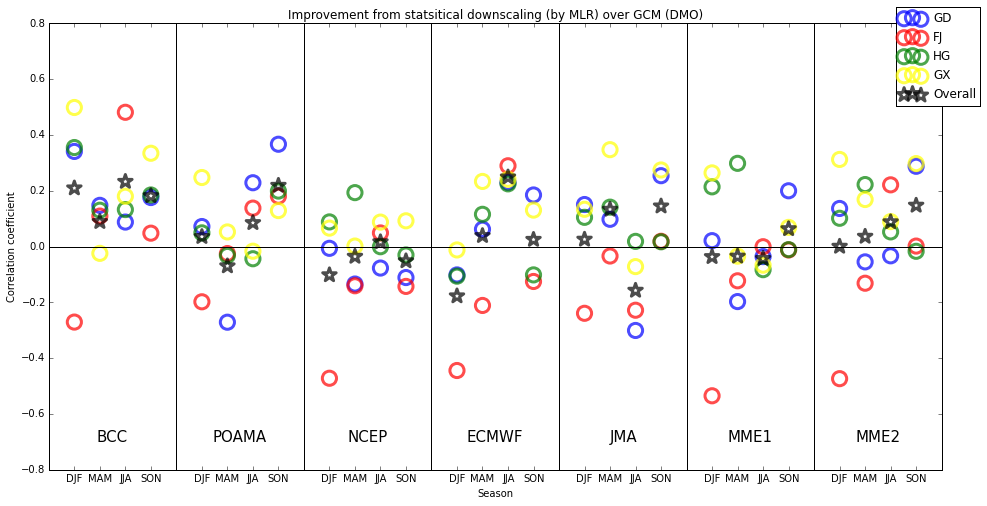

In [64]:
# Improvement from MLR from DMO
# test = np.shape(MLR_av)
# print(np.shape(MLR_av))
# print(np.shape(DMO_av))
# permute DMO_av
# np.shape(DMO_av2)

#test = list((MLR_av[2,0,:]) - (DMO_av2[2,0,:]))
#print(test)

# plot MLR correlation
fig = plt.figure(figsize=(16,8))
z1 = plt.scatter(range(0,4),list((MLR_av[0,0,:])-(DMO_av2[0,0,:])), s=200, marker='o', facecolors='none', edgecolors='blue', linewidth='3', alpha = 0.7)
z2 = plt.scatter(range(0,4),list((MLR_av[0,1,:])-(DMO_av2[0,1,:])), s=200, marker='o', facecolors='none', edgecolors='red', linewidth='3', alpha = 0.7)
z3 = plt.scatter(range(0,4),list((MLR_av[0,2,:])-(DMO_av2[0,2,:])), s=200, marker='o', facecolors='none', edgecolors='green', linewidth='3', alpha = 0.7)
z4 = plt.scatter(range(0,4),list((MLR_av[0,3,:])-(DMO_av2[0,3,:])), s=200, marker='o', facecolors='none', edgecolors='yellow', linewidth='3', alpha = 0.7)
z5 = plt.scatter(range(0,4),list((MLR_av[0,4,:])-(DMO_av2[0,4,:])), s=200, marker='*', facecolors='none', edgecolors='black', linewidth='3', alpha = 0.7)

z1 = plt.scatter(range(5,9),list((MLR_av[1,0,:])-(DMO_av2[1,0,:])), s=200, marker='o', facecolors='none', edgecolors='blue', linewidth='3', alpha = 0.7)
z2 = plt.scatter(range(5,9),list((MLR_av[1,1,:])-(DMO_av2[1,1,:])), s=200, marker='o', facecolors='none', edgecolors='red', linewidth='3', alpha = 0.7)
z3 = plt.scatter(range(5,9),list((MLR_av[1,2,:])-(DMO_av2[1,2,:])), s=200, marker='o', facecolors='none', edgecolors='green', linewidth='3', alpha = 0.7)
z4 = plt.scatter(range(5,9),list((MLR_av[1,3,:])-(DMO_av2[1,3,:])), s=200, marker='o', facecolors='none', edgecolors='yellow', linewidth='3', alpha = 0.7)
z5 = plt.scatter(range(5,9),list((MLR_av[1,4,:])-(DMO_av2[1,4,:])), s=200, marker='*', facecolors='none', edgecolors='black', linewidth='3', alpha = 0.7)

z1 = plt.scatter(range(10,14),list((MLR_av[2,0,:])-(DMO_av2[2,0,:])), s=200, marker='o', facecolors='none', edgecolors='blue', linewidth='3', alpha = 0.7)
z2 = plt.scatter(range(10,14),list((MLR_av[2,1,:])-(DMO_av2[2,1,:])), s=200, marker='o', facecolors='none', edgecolors='red', linewidth='3', alpha = 0.7)
z3 = plt.scatter(range(10,14),list((MLR_av[2,2,:])-(DMO_av2[2,2,:])), s=200, marker='o', facecolors='none', edgecolors='green', linewidth='3', alpha = 0.7)
z4 = plt.scatter(range(10,14),list((MLR_av[2,3,:])-(DMO_av2[2,3,:])), s=200, marker='o', facecolors='none', edgecolors='yellow', linewidth='3', alpha = 0.7)
z5 = plt.scatter(range(10,14),list((MLR_av[2,4,:])-(DMO_av2[2,4,:])), s=200, marker='*', facecolors='none', edgecolors='black', linewidth='3', alpha = 0.7)

z1 = plt.scatter(range(15,19),list((MLR_av[3,0,:])-(DMO_av2[3,0,:])), s=200, marker='o', facecolors='none', edgecolors='blue', linewidth='3', alpha = 0.7)
z2 = plt.scatter(range(15,19),list((MLR_av[3,1,:])-(DMO_av2[3,1,:])), s=200, marker='o', facecolors='none', edgecolors='red', linewidth='3', alpha = 0.7)
z3 = plt.scatter(range(15,19),list((MLR_av[3,2,:])-(DMO_av2[3,2,:])), s=200, marker='o', facecolors='none', edgecolors='green', linewidth='3', alpha = 0.7)
z4 = plt.scatter(range(15,19),list((MLR_av[3,3,:])-(DMO_av2[3,3,:])), s=200, marker='o', facecolors='none', edgecolors='yellow', linewidth='3', alpha = 0.7)
z5 = plt.scatter(range(15,19),list((MLR_av[3,4,:])-(DMO_av2[3,4,:])), s=200, marker='*', facecolors='none', edgecolors='black', linewidth='3', alpha = 0.7)

z1 = plt.scatter(range(20,24),list((MLR_av[4,0,:])-(DMO_av2[4,0,:])), s=200, marker='o', facecolors='none', edgecolors='blue', linewidth='3', alpha = 0.7)
z2 = plt.scatter(range(20,24),list((MLR_av[4,1,:])-(DMO_av2[4,1,:])), s=200, marker='o', facecolors='none', edgecolors='red', linewidth='3', alpha = 0.7)
z3 = plt.scatter(range(20,24),list((MLR_av[4,2,:])-(DMO_av2[4,2,:])), s=200, marker='o', facecolors='none', edgecolors='green', linewidth='3', alpha = 0.7)
z4 = plt.scatter(range(20,24),list((MLR_av[4,3,:])-(DMO_av2[4,3,:])), s=200, marker='o', facecolors='none', edgecolors='yellow', linewidth='3', alpha = 0.7)
z5 = plt.scatter(range(20,24),list((MLR_av[4,4,:])-(DMO_av2[4,4,:])), s=200, marker='*', facecolors='none', edgecolors='black', linewidth='3', alpha = 0.7)

z1 = plt.scatter(range(25,29),list((MLR_av[5,0,:])-(DMO_av2[5,0,:])), s=200, marker='o', facecolors='none', edgecolors='blue', linewidth='3', alpha = 0.7)
z2 = plt.scatter(range(25,29),list((MLR_av[5,1,:])-(DMO_av2[5,1,:])), s=200, marker='o', facecolors='none', edgecolors='red', linewidth='3', alpha = 0.7)
z3 = plt.scatter(range(25,29),list((MLR_av[5,2,:])-(DMO_av2[5,2,:])), s=200, marker='o', facecolors='none', edgecolors='green', linewidth='3', alpha = 0.7)
z4 = plt.scatter(range(25,29),list((MLR_av[5,3,:])-(DMO_av2[5,3,:])), s=200, marker='o', facecolors='none', edgecolors='yellow', linewidth='3', alpha = 0.7)
z5 = plt.scatter(range(25,29),list((MLR_av[5,4,:])-(DMO_av2[5,4,:])), s=200, marker='*', facecolors='none', edgecolors='black', linewidth='3', alpha = 0.7)

z1 = plt.scatter(range(30,34),list((MLR_av[6,0,:])-(DMO_av2[5,0,:])), s=200, marker='o', facecolors='none', edgecolors='blue', linewidth='3', alpha = 0.7)
z2 = plt.scatter(range(30,34),list((MLR_av[6,1,:])-(DMO_av2[5,1,:])), s=200, marker='o', facecolors='none', edgecolors='red', linewidth='3', alpha = 0.7)
z3 = plt.scatter(range(30,34),list((MLR_av[6,2,:])-(DMO_av2[5,2,:])), s=200, marker='o', facecolors='none', edgecolors='green', linewidth='3', alpha = 0.7)
z4 = plt.scatter(range(30,34),list((MLR_av[6,3,:])-(DMO_av2[5,3,:])), s=200, marker='o', facecolors='none', edgecolors='yellow', linewidth='3', alpha = 0.7)
z5 = plt.scatter(range(30,34),list((MLR_av[6,4,:])-(DMO_av2[5,4,:])), s=200, marker='*', facecolors='none', edgecolors='black', linewidth='3', alpha = 0.7)

#z1 = plt.scatter(range(5,9),list(MLR_av[1,0,:]), s=200, marker='o', facecolors='none', edgecolors='blue', linewidth='3', alpha = 0.7)
#z2 = plt.scatter(range(5,9),list(MLR_av[1,1,:]), s=200, marker='o', facecolors='none', edgecolors='red', linewidth='3', alpha = 0.7)
#z3 = plt.scatter(range(5,9),list(MLR_av[1,2,:]), s=200, marker='o', facecolors='none', edgecolors='green', linewidth='3', alpha = 0.7)
#z4 = plt.scatter(range(5,9),list(MLR_av[1,3,:]), s=200, marker='o', facecolors='none', edgecolors='yellow', linewidth='3', alpha = 0.7)

pylab.xticks(list(range(0,34)), ['DJF','MAM','JJA','SON','','DJF','MAM','JJA','SON','','DJF','MAM','JJA','SON','','DJF','MAM','JJA','SON','','DJF','MAM','JJA','SON','','DJF','MAM','JJA','SON','','DJF','MAM','JJA','SON'])
pylab.ylim([-0.8,0.8])
pylab.xlim([-1,34])
plt.plot([-1,34],[0,0],color = 'black')
plt.plot([4,4],[-1,1],color = 'black')
plt.plot([9,9],[-1,1],color = 'black')
plt.plot([14,14],[-1,1],color = 'black')
plt.plot([19,19],[-1,1],color = 'black')
plt.plot([24,24],[-1,1],color = 'black')
plt.plot([29,29],[-1,1],color = 'black')
mlh = -0.7
mll = np.linspace(2,32, num=7)-0.5
mlist = ['BCC','POAMA','NCEP','ECMWF','JMA','MME1','MME2']
for i in range(0,7):
    plt.text(mll[i],mlh,mlist[i],horizontalalignment='center',fontsize=15)
    
plt.title('Improvement from statsitical downscaling (by MLR) over GCM (DMO)')
plt.ylabel('Correlation coefficient')
plt.xlabel('Season')
plt.legend((z1,z2,z3,z4,z5),('GD','FJ','HG','GX','Overall'),bbox_to_anchor=(1.05, 1.05))

#plt.show()
pylab.savefig("/home/calvin/Research_work/MCACCA_downscaling/Project_1/script2/python_plots/MLR_DMO_impro.pdf")


In [6]:
#for m in range(0,5):
#DJF_av = np.mean(DMOcorr_DJF,2)
x = np.matrix(DMOcorr_DJF)
#x.mean(2)
#MAM_av = np.mean(DMOcorr_MAM[:,m])
#JJA_av = np.mean(DMOcorr_JJA[:,m])
#SON_av = np.mean(DMOcorr_SON[:,m])
#season_av = np.array([DJF_av, MAM_av, JJA_av, SON_av])
#print(DJF_av)
x.mean(0)


matrix([[ 0.03526852,  0.24070104,  0.26684464,  0.33955535,  0.2062321 ,
          0.31703105]])